<a href="https://www.kaggle.com/code/damianlewandowski7/digit-v1?scriptVersionId=128405442" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import numpy as np 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing


import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train = pd.read_csv(r'/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv(r'/kaggle/input/digit-recognizer/test.csv')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = train.drop(['label'], axis = 1) # drop label col
y = train['label'] # set target col

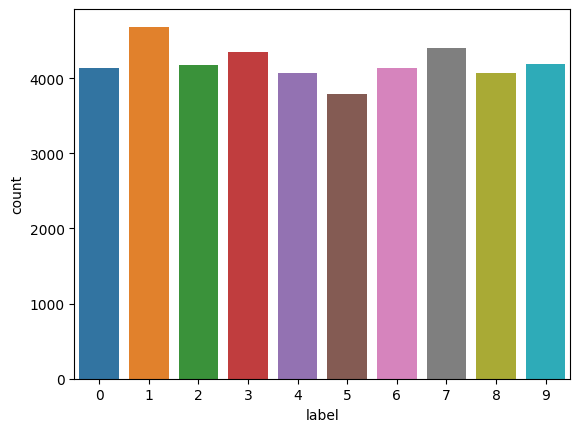

In [5]:
sns.countplot(x=y)
plt.show()

Distribution of numbers from 0 to 9 looks well.

# Tackle with missing data

In [6]:
X.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
test.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

It look like somone collected carefuly data, there is no missing values in both datasets. So go ahead!

# Normalization

Result of normalization will be acceleration of computing for CNN neural network

In [8]:
X /= 255.0
test /= 255.0


# Reshape image in 3 dim

In [9]:
X = X.values.reshape(-1, 28, 28, 1)

In [10]:
test = test.values.reshape(-1, 28, 28, 1)

# To categorical label 

In [11]:
y = tf.keras.utils.to_categorical(y, num_classes=10)

In [12]:
y[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Split training and validation set 

In [13]:
random_seed = 100
X_train, X_val, Y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=random_seed)

# Visulation sample from dataset

In [14]:
len(X_train)

28140

In [15]:
train['label']

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

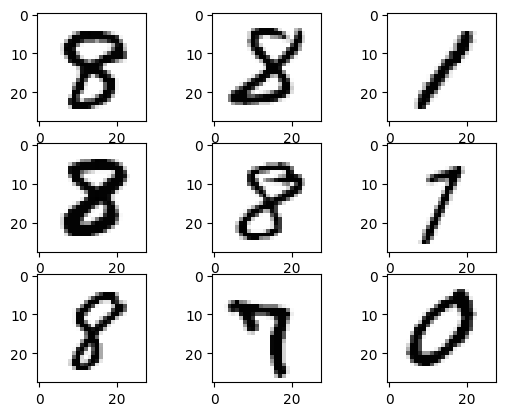

In [16]:
for n in range(1,10):
    
    plt.subplot(3, 3, n)
    plt.imshow(X_train[n], cmap='Greys')
plt.show()

# CNN - LeNet-5

The LeNet-5 architecture consists of two sets of convolutional and average pooling layers, followed by a flattening convolutional layer, then two fully-connected layers and finally a softmax classifier.

In [17]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, AveragePooling2D, Dense, Flatten
from tensorflow.keras.activations import tanh, softmax
from tensorflow.keras.metrics import categorical_crossentropy


model = tf.keras.Sequential()
# Convolution layer  
model.add(Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation=tanh, input_shape=(28, 28, 1), padding='same'))
# Pooling layer 
model.add(AveragePooling2D(pool_size=(2,2), strides=(1,1), padding='valid'))
# Convolution layer 
model.add(Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation=tanh, padding='valid'))
# Pooling layer 
model.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# Full connected convolution layer
model.add(Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation=tanh, padding='valid'))
# Flatten the CNN outputs result of this it is fully connected layers
model.add(Flatten())

# Full connected layer 
model.add(Dense(84, activation=tanh))

# Output layer with softmax func activation
model.add(Dense(10, activation=softmax))


In [18]:
model.compile(loss = categorical_crossentropy, optimizer='SGD', metrics=['accuracy'])

In [19]:
hist = model.fit(X_train, Y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

Epoch 1/10
220/220 [==============================] - 26s 112ms/step - loss: 0.9034 - accuracy: 0.7805 - val_loss: 0.4651 - val_accuracy: 0.8719
Epoch 2/10
220/220 [==============================] - 24s 109ms/step - loss: 0.4011 - accuracy: 0.8888 - val_loss: 0.3621 - val_accuracy: 0.8964
Epoch 3/10
220/220 [==============================] - 24s 111ms/step - loss: 0.3318 - accuracy: 0.9049 - val_loss: 0.3161 - val_accuracy: 0.9093
Epoch 4/10
220/220 [==============================] - 24s 111ms/step - loss: 0.2933 - accuracy: 0.9158 - val_loss: 0.2841 - val_accuracy: 0.9172
Epoch 5/10
220/220 [==============================] - 24s 111ms/step - loss: 0.2654 - accuracy: 0.9240 - val_loss: 0.2617 - val_accuracy: 0.9231
Epoch 6/10
220/220 [==============================] - 24s 110ms/step - loss: 0.2439 - accuracy: 0.9298 - val_loss: 0.2434 - val_accuracy: 0.9286
Epoch 7/10
220/220 [==============================] - 24s 109ms/step - loss: 0.2260 - accuracy: 0.9351 - val_loss: 0.2283 - val_ac

In [20]:
results = model.predict(test)

results = np.argmax(results, axis=1)

results = pd.Series(results, name='Label')

875/875 [==============================] - 10s 11ms/step


In [21]:
submission = pd.concat([pd.Series(range(1, 28001), name='ImageId'), results], axis=1)

submission.to_csv('cnn_mnist.csv', index=False)